# Monomial interpolation

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt
%matplotlib inline

Now plot the monomial basis on the interval [0,1] up to $x^9$.

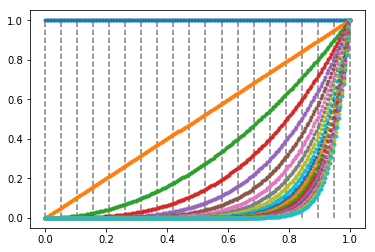

In [4]:
x = np.linspace(0, 1, 200)

n = 20

for i in range(n):
    pt.plot(x, x**i, '.')
    
pt.vlines(np.linspace(0, 1, n), 0, 1, alpha=0.5, linestyle="--")

* How do the entries of the Vandermonde matrix relate to this plot?

------------------
* Guess the condition number of the Vandermonde matrix for $n=5,10,20$:

In [6]:
n = 20

x = np.linspace(0, 1, n)

V = np.zeros((n, n))
for i in range(n):
    V[:, i] = x**i

la.cond(V)

11584400332153032.0

## Practical Impact

Is there really a practical impact to this? Let's find out by plotting the error in an interpolant:

array([  0.00000000e+00,   6.27735815e+00,   1.58539686e-01,
        -4.31219765e+01,   1.10277430e+01,   3.95696989e+01,
         1.03048530e+02,  -2.39484331e+02,   1.57531420e+02,
        -3.50069823e+01])

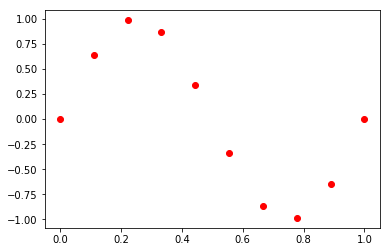

In [12]:
n = 10

def f(x):
    return np.sin(2*np.pi*x)

x = np.linspace(0, 1, n)

pt.plot(x,f(x),'or')

V = np.zeros((n, n))
for i in range(n):
    V[:, i] = x**i

coeffs = la.solve(V, f(x))
coeffs

In [16]:
many_x = np.linspace(0, 1, 100)
interp = 0
for i in range(n):
    interp += coeffs[i]*many_x**i    

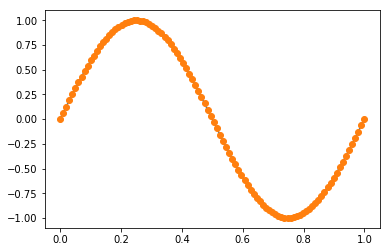

In [17]:
pt.plot(many_x, f(many_x))
pt.plot(many_x, interp,'o')

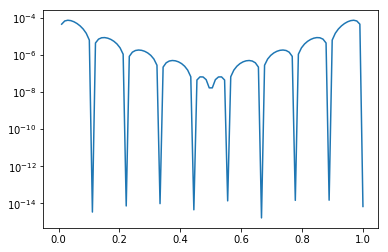

In [18]:
pt.semilogy(many_x, np.abs(interp - f(many_x)))

Observations?

In [ ]:
#clear
# Those fuzzy bits down there are the floating point error.
# In practice, results can be *much* better than condition number suggests--even "most of the time".
# Condition number bounds are *worst-case*.